In [15]:
import lammps2d as lmp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [16]:
x = np.linspace(-10,10,3).reshape(3,1,1)
y = np.linspace(-10,10,3).reshape(1,3,1)
z = np.zeros(1).reshape(1,1,1)

In [17]:
#initial_positions = np.array([np.array(i) for i in np.broadcast(x, y, z)])
#initial_positions = np.array([[-10,0,0],[10,0,0]])
initial_positions = np.array([[0,0,0]])
print(initial_positions)

[[0 0 0]]


In [18]:
sim = lmp.sim(initial_positions,magnitude = 0,frequency=1,angle=0,framerate=1e6,timestep=1e-6,run = 1e-2)

In [19]:
sim.generate_scripts()

In [20]:
sim.run()

In [21]:
sim.diffusion

array([  1.00000000e-06])

In [22]:
trj = sim.load(read_trj=True)

(-5, 5)

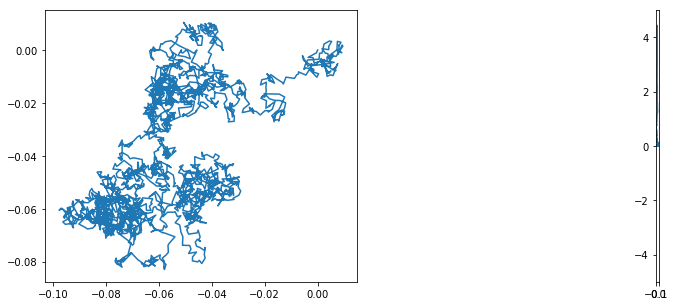

In [23]:
idx = pd.IndexSlice

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
for i in trj.index.get_level_values('id').unique():
    ax1.plot(trj.loc[idx[:,i],'x'],trj.loc[idx[:,i],'y'])
    ax2.plot(trj.loc[idx[:,i],'x'],trj.loc[idx[:,i],'z'])
    
ax1.set(aspect='equal');
ax2.set(aspect='equal');
ax2.set_ylim([-5,5])

(0, 10)

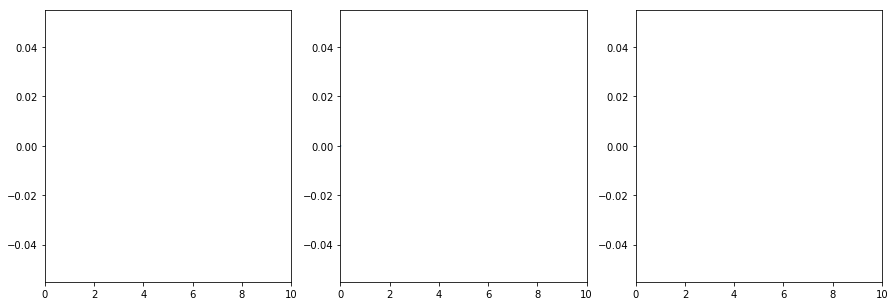

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
timestep = sim.run_parameters.timestep
for i in trj.index.get_level_values('id').unique():
    ax1.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').mux)
    ax2.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').muy)
    ax3.plot(trj.xs(1,level='id').index*timestep,trj.xs(1,level='id').muz)

ax1.set_xlim([0,10])
ax2.set_xlim([0,10])
ax3.set_xlim([0,10])

# Conclusion  

At leat it appears that the library is being loaded properly now. I'll move the search for stable parameters to a new notebook.